In [1]:
from math import sin, exp
import matplotlib.pyplot as plt
%matplotlib inline
##importing libraries

In [2]:
##Defining three difference force functions
def f1(t): #Constant force
    return 5.0

def f2(wf, t): #Harmonic driver force
    return 5.0*sin(wf*t)

def f3(lam, t0, t): #Pulse driver force
    return 5.0*exp(-1 * lam * (t-t0)**2)

def F(case, t, w, x, b, v, lam, t0, wf): ##Defining differential equation
    #parameters include case, t, x, v, etc. 
    #case paramter used to see which type of force function to use
    #some of the parameters are not used. example: case #1,4,7 does not use lam, wf, t0
    if case in [1,4,7]: #if case is 1,4,7, use constant force
        return f1(t) - w*w*x - b*v
    if case in [2,5,8]: #if case is 2,5,8 use harmonic driver force
        return f2(wf, t) - w*w*x - b*v
    if case in [3,6,9]: #if case is 3,6,9 use pulse driver force
        return f3(lam, t0, t) - w*w*x - b*v
    return 0

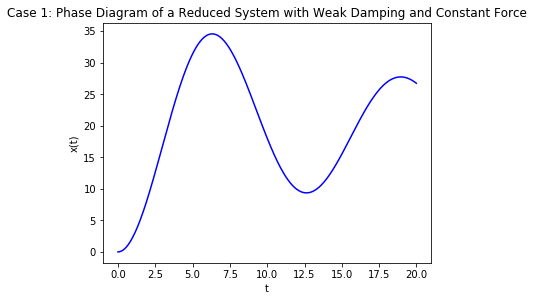

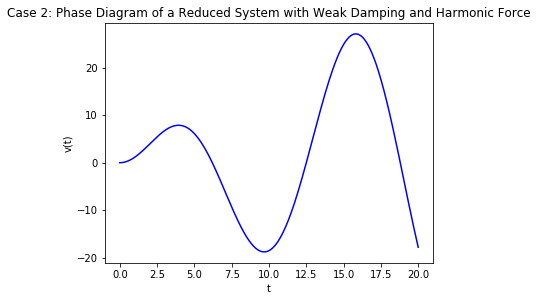

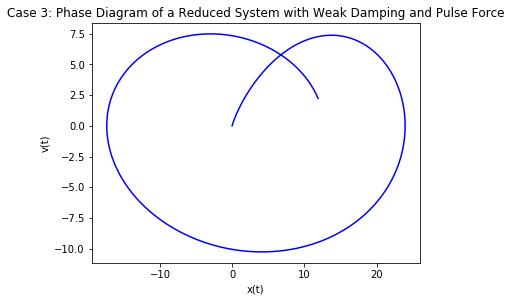

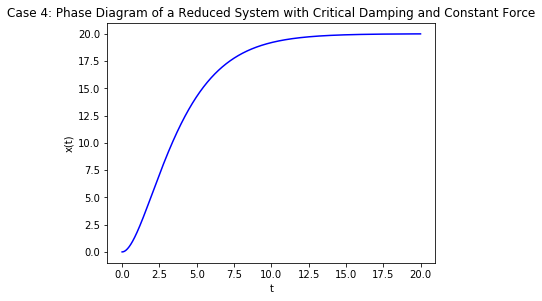

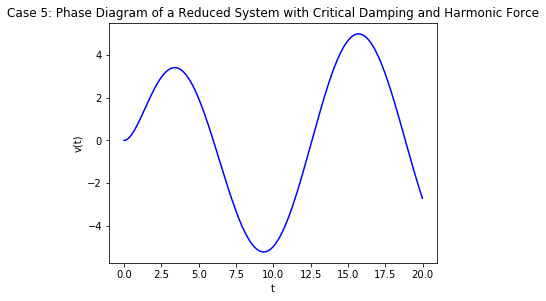

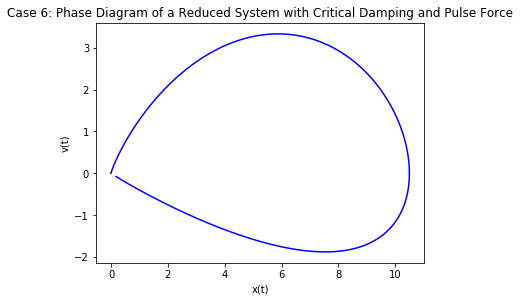

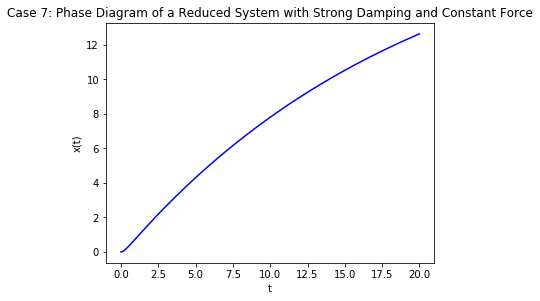

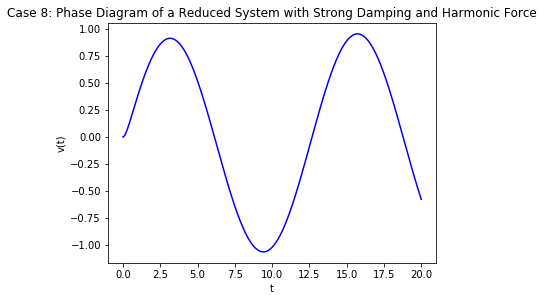

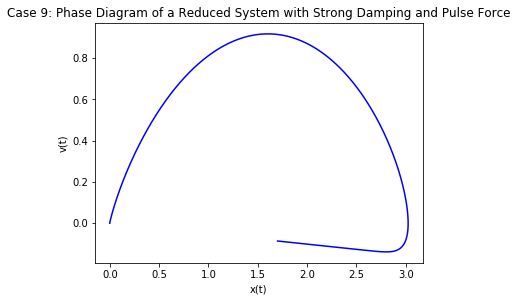

In [3]:
for case in range(1,10):
    #There are 9 different cases, so the program is run for each case
    #Case numbers are read from left to right (1: weak, constant; 2: weak, harmonic)
    
    ######## initializing variables ########
    N = 2000 #number of elements in array
    t = [0.0] * N #time array
    dt = 0.01 #timestep
    t0 = 0.0 #init time
    ti = dt/2.0 #intermediate time variable
    
    x = [0.0] * N #position array
    xi = 0.0 #intermediate position variable

    v = [0.0] * N #velocity array
    w = 0.0 #angular velocity
    wf = 0.0 #final angular velocity
    
    b = 0.0  #beta
    lam = 0.0 #lambda
    #defining variables specific to each case as per the table in the instructions
    if case==1:
        w = 0.5
        b = 0.1
    if case==2:
        w = 0.5
        b = 0.1
        wf = 0.5
    if case==3:
        w = 0.5
        b = 0.1
        t0 = 5
        lam = 0.25
    if case==4:
        w = 0.5
        b = 1
    if case==5:
        w = 0.5
        b = 1
        wf = 0.5
    if case==6:
        w = 0.5
        b = 1
        t0 = 5
        lam = 0.25
    if case==7:
        w = 0.5
        b = 5
    if case==8:
        w = 0.5
        b = 5
        wf = 0.5
    if case==9:
        w = 0.5
        b = 5
        t0 = 5
        lam = 0.25
    
    vi = F(case, 0, w, 0, b, 0, lam, t0, wf)*dt/2.0 #defining intermediate velocity variable with F(0,0,0)

    ######## Leapfrog / Evolution algorithm ########
    for i in range(N-1): #Looping through N-1=1999 times
        t[i+1] = t[i] + dt
        x[i+1] = x[i] + vi*dt
        v[i+1] = v[i] + F(case, ti, w, xi, b, vi, lam, t0, wf) * dt#case, t, w, x, b, v, lam, t0, wf
        ti = ti + dt
        xi = 0.5*(x[i+1]+x[i]) + v[i+1]*dt
        vi = 0.5*(v[i+1]+v[i]) + F(case, t[i+1], w, x[i+1], b, v[i+1], lam, t0, wf)*dt
    
    ######## Ploting Graphs ########
    fig = plt.figure(figsize=(20,15))
    title = "Case {}: Phase Diagram of a Reduced System with {} Damping and {} Force" #Title
    if case==1:
        ax = fig.add_subplot(331)
        ax.plot(t, x, 'b-')
        ax.set_xlabel("t")
        ax.set_ylabel("x(t)")
        ax.set_title(title.format(case, "Weak", "Constant")) #Adding type of damping, force in title
    if case==2:
        ax = fig.add_subplot(332)
        ax.plot(t, v, 'b-')
        ax.set_xlabel("t")
        ax.set_ylabel("v(t)")
        ax.set_title(title.format(case, "Weak", "Harmonic"))
    if case==3:
        ax = fig.add_subplot(333)
        ax.plot(x, v, 'b-')
        ax.set_xlabel("x(t)")
        ax.set_ylabel("v(t)")
        ax.set_title(title.format(case, "Weak", "Pulse"))
    if case==4:
        ax = fig.add_subplot(334)
        ax.plot(t, x, 'b-')
        ax.set_xlabel("t")
        ax.set_ylabel("x(t)")
        ax.set_title(title.format(case, "Critical", "Constant"))
    if case==5:
        ax = fig.add_subplot(335)
        ax.plot(t, v, 'b-')
        ax.set_xlabel("t")
        ax.set_ylabel("v(t)")
        ax.set_title(title.format(case, "Critical", "Harmonic"))
    if case==6:
        ax = fig.add_subplot(336)
        ax.plot(x, v, 'b-')
        ax.set_xlabel("x(t)")
        ax.set_ylabel("v(t)")
        ax.set_title(title.format(case, "Critical", "Pulse"))
    if case==7:
        ax = fig.add_subplot(337)
        ax.plot(t, x, 'b-')
        ax.set_xlabel("t")
        ax.set_ylabel("x(t)")
        ax.set_title(title.format(case, "Strong", "Constant"))
    if case==8:
        ax = fig.add_subplot(338)
        ax.plot(t, v, 'b-')
        ax.set_xlabel("t")
        ax.set_ylabel("v(t)")
        ax.set_title(title.format(case, "Strong", "Harmonic"))
    if case==9:
        ax = fig.add_subplot(339)
        ax.plot(x, v, 'b-')
        ax.set_xlabel("x(t)")
        ax.set_ylabel("v(t)")
        ax.set_title(title.format(case, "Strong", "Pulse"))
    ###Output is all the graphs